**Professor:** Glenn Henshaw.

**Class:** MAC 270.

**Assignment:** Final Project.

**Students:** Adham Ammar

**Date:** 12/17/2019.

# - NYC Motor Vehicle Collisions (2012-2019).

## Introduction:

 The utilized dataset is about motor vehicle collisions that has occured in NYC from July 2012 til the beginning of December 2019. This dataset was available on NYC OpenData website , and it was mainly provided the NYPD. The dataset contain information from all police reported motor vehicle collisions in NYC. The police report (MV104-AN) is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage. The dataset consists of about 1.62M rows and 29 columns, each row represents a crash event, also it includes a wide variety of information about the crash event from time and location of the event to the contributing factors and types of vehicles included.

  We started with showing some basic information about the dataset and converting the date and time columns into the proper datatypes so we could perform time analysis on the dataset. The analysis report consists of three parts; in the first part  merging processes were performed and then some of the merged datasets were used later in a multiple bar plot, secondly, an extensive time analysis was done using the time and date columns such that we showed how the number of collisions have varied from 2012 to 2019, finally, a location analysis was performed for the intersections and street addresses with the most car collisions in NYC, and an accurate rank was derived for the top 10 intersections in Nyc with the most car collisions. 



## - Data Dictionary:

- CRASH DATE:	Occurrence date of collision.


- CRASH TIME:	Occurrence time of collision.


- BOROUGH:	Borough where collision occurred.


- ZIP CODE:	Postal code of incident occurrence.


- LATITUDE:	Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326).


- LONGITUDE:	Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326).


- LOCATION:	Latitude , Longitude pairPoint.


- ON STREET NAME:	Street on which the collision occurred.


- CROSS STREET NAME:	Nearest cross street to the collision.


- OFF STREET NAME:	Street address if known.


- NUMBER OF PERSONS INJURED:	Number of persons injured.


- NUMBER OF PERSONS KILLED:	Number of persons killed.


- NUMBER OF PEDESTRIANS INJURED:	Number of pedestrians injured.


- NUMBER OF PEDESTRIANS KILLED:	Number of pedestrians killed.


- NUMBER OF CYCLIST INJURED:	Number of cyclists injured.


- NUMBER OF CYCLIST KILLED:	Number of cyclists killed.


- NUMBER OF MOTORIST INJURED:	Number of vehicle occupants injured.


- NUMBER OF MOTORIST KILLED:	Number of vehicle occupants killed.


- CONTRIBUTING FACTOR VEHICLE 1:	Factors contributing to the collision for designated vehicle.


- CONTRIBUTING FACTOR VEHICLE 2:	Factors contributing to the collision for designated vehicle.


- CONTRIBUTING FACTOR VEHICLE 3:	Factors contributing to the collision for designated vehicle.


- CONTRIBUTING FACTOR VEHICLE 4:	Factors contributing to the collision for designated vehicle.


- CONTRIBUTING FACTOR VEHICLE 5:	Factors contributing to the collision for designated vehicle.


- COLLISION_ID:	Unique record code generated by system. Primary Key for Crash table.


- VEHICLE TYPE CODE 1:	Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)


- VEHICLE TYPE CODE 2:	Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)


- VEHICLE TYPE CODE 3:	Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)


- VEHICLE TYPE CODE 4:	Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)


- VEHICLE TYPE CODE 5:	Type of vehicle based on the selected vehicle category (ATV, bicycle, car/suv, ebike, escooter, truck/bus, motorcycle, other)


In [1071]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [1072]:
collisions = pd.read_csv(r'C:\Users\Adham\Desktop\Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\Adham\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1073]:
collisions.shape 

(1617414, 29)

In [1074]:
collisions.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [1075]:
# converting the date and time columns to datetime datatpe.
collisions['CRASH DATE'] = pd.to_datetime(collisions['CRASH DATE'])
collisions['CRASH TIME'] = pd.to_datetime(collisions['CRASH TIME'])

In [1076]:
collisions.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-04-06,2019-12-18 13:00:00,STATEN ISLAND,10306,40.571987,-74.108230,POINT (-74.10823 40.571987),NaN,NaN,2424 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,4109794,Sedan,NaN,NaN,NaN,NaN
1,2019-04-09,2019-12-18 18:50:00,BROOKLYN,11220,40.633675,-74.009640,POINT (-74.00964 40.633675),NaN,NaN,850 62 STREET,...,NaN,NaN,NaN,NaN,4111841,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,2019-04-23,2019-12-18 09:00:00,MANHATTAN,10001,40.745830,-73.991920,POINT (-73.99192 40.74583),NaN,NaN,121 WEST 27 STREET,...,Unspecified,NaN,NaN,NaN,4121967,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-04-03,2019-12-18 08:55:00,STATEN ISLAND,10301,40.644073,-74.077774,POINT (-74.077774 40.644073),STUYVESANT PLACE,WALL STREET,NaN,...,NaN,NaN,NaN,NaN,4110892,Sedan,NaN,NaN,NaN,NaN
4,2019-04-03,2019-12-18 09:31:00,NaN,NaN,NaN,NaN,NaN,188 STREET,GRAND CENTRAL PARKWAY,NaN,...,Unspecified,NaN,NaN,NaN,4108091,Sedan,Sedan,NaN,NaN,NaN


 # Part A: Merging tables:
## Content:
#### - Table 1A: shows the rank of the boroughs of nyc according to the collisions occuring in each borough.
#### - Table 2A: an imported dataset showing population for each borough.
#### - Table 3A: the product table from merging tables 1A & 2A on 'BOROUGH'.
#### - Graph 1A: shows the rank of each borough according to population count and the number of motor vehicle collisions.
#### - 'collisions' dataframe merged with 'poulation' df.

In [1097]:
collision = collisions['BOROUGH'].value_counts().reset_index()

In [1098]:
collision.columns = ['BOROUGH',"Crashes Count"]

In [1099]:

collision
# Table 1A : 
# Rank of NYC boroughs according to the number of collisions occuring in each borough: 

,BOROUGH,Crashes Count
0,BROOKLYN,349969
1,QUEENS,300327
2,MANHATTAN,270198
3,BRONX,157201
4,STATEN ISLAND,48705


In [1100]:
 population =pd.read_csv(r'C:\Users\Adham\Desktop\NYC_Population_by_Borough.csv')

In [1101]:
population['Population'] = population['Population'].str.replace(',', '').astype(float) #converting the population to float.

In [1106]:
population
# Table 2A:  table showing population for each borough.

,BOROUGH,Population
0,BROOKLYN,4970026.0
1,MANHATTAN,3123068.0
2,BRONX,2717758.0
3,QUEENS,4460101.0
4,STATEN ISLAND,912458.0


In [1103]:
population.rename(columns={'Borough':'BOROUGH'}, inplace=True) #changing the column label to uppercase to match the column label in the other df enable merging. 

In [1105]:
population['BOROUGH'] = population['BOROUGH'].str.upper() # changing the values of the column to upper case to match the other values in the other table to enable merging.

In [1107]:
collision_merge1 = pd.merge(collision,population, on='BOROUGH')

In [1108]:
collision_merge1
# Table 3A:
# the product table from merging tables 1A & 2A on 'BOROUGH'


,BOROUGH,Crashes Count,Population
0,BROOKLYN,349969,4970026.0
1,QUEENS,300327,4460101.0
2,MANHATTAN,270198,3123068.0
3,BRONX,157201,2717758.0
4,STATEN ISLAND,48705,912458.0


In [1109]:
collision_merge1  = collision_merge1.set_index('BOROUGH') # resetting the index to 'BOROUGH' to have them as labels for the plot.

In [1110]:
collision_merge1


,Crashes Count,Population
BOROUGH,,
BROOKLYN,349969,4970026.0
QUEENS,300327,4460101.0
MANHATTAN,270198,3123068.0
BRONX,157201,2717758.0
STATEN ISLAND,48705,912458.0


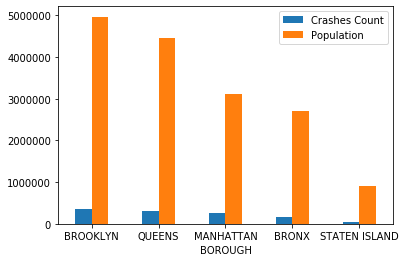

In [1111]:
collision_merge1.plot.bar(rot=0)
# Graph 1A: 
# shows the rank of each borough according to population count and the number of motor vehicle collisions

In [1112]:
 crashes_merge = pd.merge(collisions,population, on='BOROUGH') # merging the population df with the main collisions df on 'BOROUGH'

In [1113]:
crashes_merge 


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Population
0,2019-04-06,2019-12-18 13:00:00,STATEN ISLAND,10306,40.571987,-74.108230,POINT (-74.10823 40.571987),NaN,NaN,2424 HYLAN BOULEVARD,...,NaN,NaN,NaN,4109794,Sedan,NaN,NaN,NaN,NaN,912458.0
1,2019-04-03,2019-12-18 08:55:00,STATEN ISLAND,10301,40.644073,-74.077774,POINT (-74.077774 40.644073),STUYVESANT PLACE,WALL STREET,NaN,...,NaN,NaN,NaN,4110892,Sedan,NaN,NaN,NaN,NaN,912458.0
2,2019-04-19,2019-12-18 15:43:00,STATEN ISLAND,10310,40.645126,-74.108730,POINT (-74.10873 40.645126),BARD AVENUE,RICHMOND TERRACE,NaN,...,NaN,NaN,NaN,4118726,Sedan,NaN,NaN,NaN,NaN,912458.0
3,2019-04-04,2019-12-18 17:00:00,STATEN ISLAND,10305,40.601204,-74.065090,POINT (-74.06509 40.601204),LILY POND AVENUE,NARROWS ROAD SOUTH,NaN,...,Unspecified,NaN,NaN,4109784,Sedan,Sedan,NaN,NaN,NaN,912458.0
4,2019-04-11,2019-12-18 21:35:00,STATEN ISLAND,10301,40.616413,-74.103516,POINT (-74.103516 40.616413),VICTORY BOULEVARD,CLOVE ROAD,NaN,...,NaN,NaN,NaN,4113168,Sedan,NaN,NaN,NaN,NaN,912458.0
5,2019-04-06,2019-12-18 08:40:00,STATEN ISLAND,10305,40.595974,-74.070045,POINT (-74.070045 40.595974),NaN,NaN,148 SAND LANE,...,NaN,NaN,NaN,4109790,Sedan,NaN,NaN,NaN,NaN,912458.0
6,2019-04-03,2019-12-18 13:00:00,STATEN ISLAND,10307,40.513386,-74.247990,POINT (-74.24799 40.513386),NaN,NaN,5373 ARTHUR KILL ROAD,...,NaN,NaN,NaN,4108102,Sedan,NaN,NaN,NaN,NaN,912458.0
7,2019-04-07,2019-12-18 00:30:00,STATEN ISLAND,10310,40.629250,-74.123230,POINT (-74.12323 40.62925),CLOVE ROAD,DELAFIELD AVENUE,NaN,...,NaN,NaN,NaN,4110899,NaN,NaN,NaN,NaN,NaN,912458.0
8,2019-04-08,2019-12-18 20:00:00,STATEN ISLAND,10310,40.625843,-74.110770,POINT (-74.11077 40.625843),NaN,NaN,631 BEMENT AVENUE,...,Unspecified,Unspecified,NaN,4111482,Sedan,Sedan,Sedan,Sedan,NaN,912458.0
9,2019-04-09,2019-12-18 14:13:00,STATEN ISLAND,10301,40.639896,-74.087210,POINT (-74.08721 40.639896),JERSEY STREET,HENDRICKS AVENUE,NaN,...,NaN,NaN,NaN,4111970,Sedan,NaN,NaN,NaN,NaN,912458.0


# Part B: Time analysis:
### Content:
##### -  Graph 1B: shows the change in the number of motor vehicles collisions in NYC from 07-01-2012 to 12-06-2019.
##### - Graph 2B: shows the change in the number of fatal car collisions in NYC from 07-01-2012 to 12-06-2019.
##### - Plot 1B : rank of each month of the year according to the number of crashes occuring in each month:
##### - Plot 2B : rank of each day of the week according to the number of crashes occuring on each day:
##### - Plot 3B : shows the rank of each part of the day(morning,afternon,evening,night) according to the number of collisions occuring during each period.
#####  - Plot 5B: the plot shows the rank of each season of the year according to the number of motor vehicle collisions occuring during each season.

In [329]:
# graph 1B:
# the graph below shows the change in the number of motor vehicles collisions in NYC from 07-01-2012 to 12-06-2019.


Text(0, 0.5, 'Collisions')

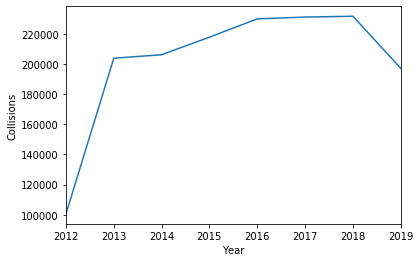

In [1040]:
collisions['CRASH DATE'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Collisions')


In [1063]:
collisions_after_2013 = collisions[collisions['CRASH DATE'] >= '2013-01-01']

Text(0, 0.5, 'Collisions')

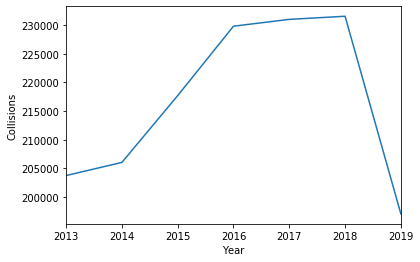

In [1066]:
collisions_after_2013['CRASH DATE'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Collisions')
# modified version of graph 1B that begins with the year 2013 instead of 2012. 

Text(0, 0.5, 'Deadly Collisions')

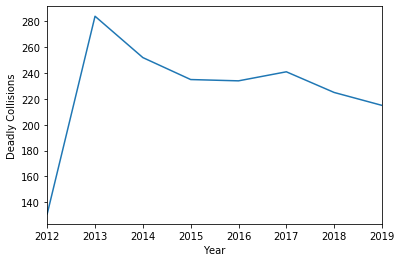

In [1116]:
fatal_collisions = collisions[collisions['NUMBER OF PERSONS KILLED']>0]
fatal_collisions['CRASH DATE'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Fatal Collisions')
# Graph 2B: the graph shows the change in the number of fatal car collisions in NYC from 07-01-2012 to 12-06-2019.

Text(0, 0.5, 'Deadly Collisions')

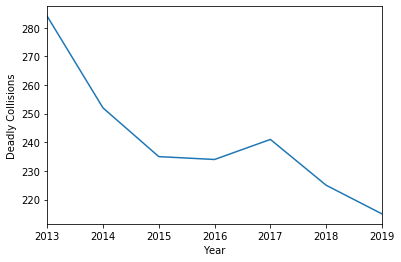

In [1117]:
fatal_collisions2 = collisions_after_2013[collisions_after_2013['NUMBER OF PERSONS KILLED']>0]
fatal_collisions2['CRASH DATE'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Year')
plt.ylabel('Deadly Collisions')
# modified version of graph 2B that begins with the year 2013 instead of 2012.

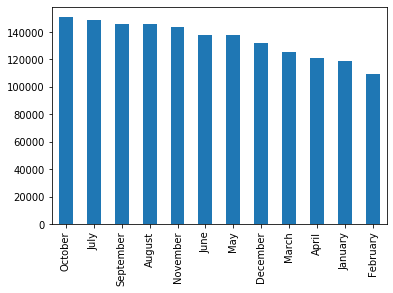

In [1118]:
#  plot 1B : rank of each month of the year according to the number of crashes occuring in each month:
collisions['CRASH DATE'].dt.month_name().value_counts().sort_values(ascending=False).plot.bar()

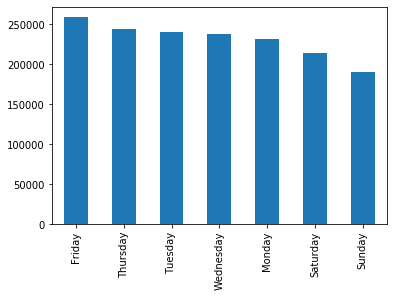

In [1119]:
# plot 2B : rank of each day of the week according to the number of crashes occuring on each day:
collisions['CRASH DATE'].dt.weekday_name.value_counts().sort_values(ascending=False).plot.bar()

In [ ]:
# Dividing the day time period into 4 portions(morning,afternoon,evening,night), and then finding the rank of each part of the day according to the number of crashes occuring during each period:

In [441]:
morning = collisions[(collisions['CRASH TIME'] > '05:00:00') & (collisions['CRASH TIME'] <= '12:00:00')] 

In [442]:
afternoon = collisions[(collisions['CRASH TIME'] > '12:00:00') & (collisions['CRASH TIME'] <= '17:00:00')] 

In [443]:
 evening = collisions[(collisions['CRASH TIME'] > '17:00:00') & (collisions['CRASH TIME'] <= '21:00:00')] 

In [444]:
night1 = collisions[(collisions['CRASH TIME'] > '21:00:00') & (collisions['CRASH TIME'] <= '23:59:59')] 

In [445]:
night2 = collisions[(collisions['CRASH TIME'] >= '00:00:00') & (collisions['CRASH TIME'] <= '05:00:00')] 

In [446]:
morning['COLLISION_ID'].size

464945

In [447]:
afternoon['COLLISION_ID'].size

524905

In [448]:
evening['COLLISION_ID'].size

357870

In [449]:
night1['COLLISION_ID'].size + night2['COLLISION_ID'].size

269694

In [450]:
df = pd.DataFrame({'part_of_the_day':['morning','afternoon','evening','night'],'Collisions':[464945,524905,357870,269694]})

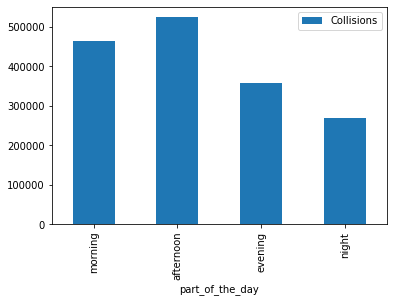

In [451]:
df.plot.bar(x='part_of_the_day',y='Collisions',rot=90)
# plot 3B : shows the rank of each part of the day according to the number of crashes occuring during each period

In [ ]:
# finding the rank of each season(winter, spring, summer, autumn) according to the number of 
# motor vehicle collisions occuring during each season. 

In [1041]:
winter15 = (collisions['CRASH DATE'] >= '2014-12-01') & (collisions['CRASH DATE'] < '2015-03-01') 
spring15 = (collisions['CRASH DATE'] >= '2015-03-01') & (collisions['CRASH DATE'] < '2015-06-01') 
summer15 = (collisions['CRASH DATE'] >= '2015-06-01') & (collisions['CRASH DATE'] < '2015-09-01')
autumn15 = (collisions['CRASH DATE'] >= '2015-09-01') & (collisions['CRASH DATE'] <= '2015-11-30')

In [1043]:
collisions[winter15]['COLLISION_ID'].size

49095

In [1044]:
collisions[spring15]['COLLISION_ID'].size

54021

In [1045]:
collisions[summer15]['COLLISION_ID'].size

56575

In [1042]:
collisions[autumn15]['COLLISION_ID'].size

56385

In [1046]:
winter16 = (collisions['CRASH DATE'] >= '2015-12-01') & (collisions['CRASH DATE'] < '2016-03-01') 
spring16 = (collisions['CRASH DATE'] >= '2016-03-01') & (collisions['CRASH DATE'] < '2016-06-01') 
summer16 = (collisions['CRASH DATE'] >= '2016-06-01') & (collisions['CRASH DATE'] < '2016-09-01')
autumn16 = (collisions['CRASH DATE'] >= '2016-09-01') & (collisions['CRASH DATE'] <= '2016-11-30')

In [1047]:
collisions[winter16]['COLLISION_ID'].size

52955

In [1048]:
collisions[spring16]['COLLISION_ID'].size

57531

In [1049]:
collisions[summer16]['COLLISION_ID'].size

60379

In [1050]:
collisions[autumn16]['COLLISION_ID'].size

58577

In [1051]:
winter17 = (collisions['CRASH DATE'] >= '2016-12-01') & (collisions['CRASH DATE'] < '2017-03-01') 
spring17 = (collisions['CRASH DATE'] >= '2017-03-01') & (collisions['CRASH DATE'] < '2017-06-01') 
summer17 = (collisions['CRASH DATE'] >= '2017-06-01') & (collisions['CRASH DATE'] < '2017-09-01')
autumn17 = (collisions['CRASH DATE'] >= '2017-09-01') & (collisions['CRASH DATE'] <= '2017-11-30')

In [1052]:
collisions[winter17]['COLLISION_ID'].size

52627

In [1053]:
collisions[spring17]['COLLISION_ID'].size

58178

In [1054]:
collisions[summer17]['COLLISION_ID'].size

60103

In [1055]:
collisions[autumn17]['COLLISION_ID'].size

59624

In [452]:
winter14 = (collisions['CRASH DATE'] >= '2013-12-01') & (collisions['CRASH DATE'] < '2014-03-01') 
spring14 = (collisions['CRASH DATE'] >= '2014-03-01') & (collisions['CRASH DATE'] < '2014-06-01') 
summer14 = (collisions['CRASH DATE'] >= '2014-06-01') & (collisions['CRASH DATE'] < '2014-09-01')
autumn14 = (collisions['CRASH DATE'] >= '2014-09-01') & (collisions['CRASH DATE'] <= '2014-11-30')

In [453]:
collisions[winter14]['COLLISION_ID'].size

49691

In [454]:
collisions[spring14]['COLLISION_ID'].size

50508

In [455]:
collisions[summer14]['COLLISION_ID'].size

52961

In [456]:
collisions[autumn14]['COLLISION_ID'].size

52897

In [458]:
winter13 = (collisions['CRASH DATE'] >= '2012-12-01') & (collisions['CRASH DATE'] < '2013-03-01') 
spring13 = (collisions['CRASH DATE'] >= '2013-03-01') & (collisions['CRASH DATE'] < '2013-06-01') 
summer13 = (collisions['CRASH DATE'] >= '2013-06-01') & (collisions['CRASH DATE'] < '2013-09-01')
autumn13 = (collisions['CRASH DATE'] >= '2013-09-01') & (collisions['CRASH DATE'] <= '2013-11-30')

In [459]:
collisions[winter13]['COLLISION_ID'].size

47165

In [460]:
collisions[spring13]['COLLISION_ID'].size

51434

In [461]:
collisions[summer13]['COLLISION_ID'].size

52540

In [462]:
collisions[autumn13]['COLLISION_ID'].size

52439

In [464]:
winter18 = (collisions['CRASH DATE'] >= '2017-12-01') & (collisions['CRASH DATE'] < '2018-03-01') 

In [465]:
spring18 = (collisions['CRASH DATE'] >= '2018-03-01') & (collisions['CRASH DATE'] < '2018-06-01') 

In [466]:
summer18 = (collisions['CRASH DATE'] >= '2018-06-01') & (collisions['CRASH DATE'] < '2018-09-01')

In [467]:
autumn18 = (collisions['CRASH DATE'] >= '2018-09-01') & (collisions['CRASH DATE'] <= '2018-11-30')

In [468]:
collisions[winter18]['COLLISION_ID'].size

53828

In [469]:
collisions[spring18]['COLLISION_ID'].size

58310

In [470]:
collisions[summer18]['COLLISION_ID'].size

60144

In [471]:
collisions[autumn18]['COLLISION_ID'].size

59493

In [1069]:
df = pd.DataFrame({'season':['winter','spring','summer','autumn'],'collisions':[50893.5,54997,57117,56569.16667]})

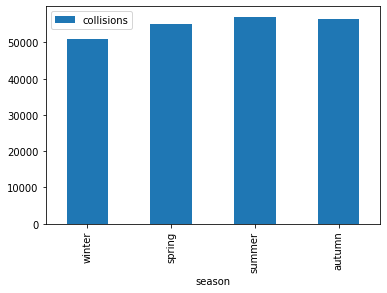

In [1070]:
df.plot.bar(x='season',y='collisions',rot=90)
# Plot 4B: the plot shows the rank of each season of the year according to the number of motor vehicle
# collisions occuring during each season.

# Part C: Finding streets and  intersections with the most car collisions:
## Content: 
##### - Table 1C:  shows the top 10 streets with the most car collisions in Nyc.
##### - Table 2C:  each row shows the intersection with the highest number of collisions in each of the streets listed in Table 1
##### - Table 3C:  shows the rank of the top ten street addresses with the most crashes using only values from the 'OFF STREET NAME' column.
##### - Table 4C:  concatenated Tables 2 & 3.
##### - Table 5C:  a sorted Table 4 showing an accurate rank of the top 10 intersections/ street addresses with the most car crashes.


In [1016]:

collision = collisions['ON STREET NAME'].value_counts().reset_index() 

In [1017]:
collision.columns = ['Street name', "Crashes Count"]


In [1018]:
collision.index = collision.index + 1

In [1019]:
collision.index.name = 'Rank'

In [1020]:

collision.head(10)
# Table 1C:
# Top 10 streets with the most crashes:

,Street name,Crashes count
Rank,,
1,BROADWAY,16042
2,ATLANTIC AVENUE,14194
3,3 AVENUE,11598
4,NORTHERN BOULEVARD,11317
5,BELT PARKWAY,10948
6,FLATBUSH AVENUE,9196
7,QUEENS BOULEVARD,8901
8,LINDEN BOULEVARD,8766
9,2 AVENUE,8416


In [ ]:
# finding intersections with the most crashes in each street  from table 1:

In [611]:

broadway = collisions[collisions['ON STREET NAME'].str.match('broadway',case=False,na=False)] #df with only broadway as the 'ON STREET NAME' value.

In [621]:
broadway['CROSS STREET NAME'].value_counts().head(1) 
# the name of the cross street with the highest number of crashes along broadway street. 

WEST 230 STREET                     92
Name: CROSS STREET NAME, dtype: int64

In [620]:
# The accurate number of crashes occuring on Broadway & West 230 st:
broadway[broadway['CROSS STREET NAME'].str.match('west 230 st',case=False,na=False)].shape 

(162, 29)

In [ ]:
# we repeat the same procedures with the other 9 streets listed in table 1:

In [ ]:
# Atlantic & Logan st, crashes count: 406.

In [628]:
atlantic_ave = collisions[collisions['ON STREET NAME'].str.match('atlantic ave',case=False,na=False)]

In [629]:
atlantic_ave['CROSS STREET NAME'].value_counts().head(1)

LOGAN STREET                        251
Name: CROSS STREET NAME, dtype: int64

In [634]:
atlantic_ave[atlantic_ave['CROSS STREET NAME'].str.match('logan st',case=False,na=False)].shape

(406, 29)

In [ ]:
# 3rd Ave & East 59 st, crashes count: 164.

In [659]:
 third_ave = collisions[(collisions['ON STREET NAME'].str.match('3 ave',case=False,na=False)) | (collisions['ON STREET NAME'].str.match('third avenue',na=False,case=False))]

In [660]:
third_ave['CROSS STREET NAME'].value_counts().head(1)

EAST 59 STREET    115
Name: CROSS STREET NAME, dtype: int64

In [662]:
third_ave[third_ave['CROSS STREET NAME'].str.match('east 59 st',case=False,na=False)].shape

(164, 29)

In [ ]:
# Northern Blvd & Clearview Expwy, crashes count: 359.

In [676]:
 northern_blvd = collisions[(collisions['ON STREET NAME'].str.match('northern boulevard',case=False,na=False)) | (collisions['ON STREET NAME'].str.match('northern blvd',case=False,na=False))]

In [677]:
northern_blvd['CROSS STREET NAME'].value_counts().head(1)

CLEARVIEW EXPRESSWAY                170
Name: CROSS STREET NAME, dtype: int64

In [682]:
northern_blvd[northern_blvd['CROSS STREET NAME'].str.match('clearview',case=False,na=False)].shape

(359, 29)

In [ ]:
# Belt Pkwy & bay pkwy , crashes count: 14.

In [684]:
belt_pkwy = collisions[collisions['ON STREET NAME'].str.match('belt',case=False,na=False)]

In [687]:
belt_pkwy['CROSS STREET NAME'].value_counts().head(1)

bay parkway    6
Name: CROSS STREET NAME, dtype: int64

In [696]:
belt_pkwy[belt_pkwy['CROSS STREET NAME'].str.match('bay p',case=False,na=False)].shape

(14, 29)

In [ ]:
# Flatbush Ave & Grand Army Plaza , crashes count: 594:

In [712]:
flatbush_ave = collisions[collisions['ON STREET NAME'].str.match('flatbush ave',case=False,na=False)]

In [714]:
flatbush_ave['CROSS STREET NAME'].value_counts().head(1)


GRAND ARMY PLAZA                    372
Name: CROSS STREET NAME, dtype: int64

In [718]:
flatbush_ave[flatbush_ave['CROSS STREET NAME'].str.match('grand army plaza',case=False,na=False)].shape

(594, 29)

In [ ]:
# Queens Blvd & Woodhaven Blvd , Crashes count: 409.

In [719]:
 queens_blvd = collisions[(collisions['ON STREET NAME'].str.match('queens boulevard',case=False,na=False)) | (collisions['ON STREET NAME'].str.match('queens blvd',case=False,na=False))]

In [720]:
queens_blvd['CROSS STREET NAME'].value_counts().head(1)

WOODHAVEN BOULEVARD                 258
Name: CROSS STREET NAME, dtype: int64

In [724]:
queens_blvd[queens_blvd['CROSS STREET NAME'].str.match('woodhaven',case=False,na=False)].shape

(409, 29)

In [ ]:
# Linden Blvd & Pennsylvania Ave , Crashes count: 269. 

In [725]:
linden_blvd = collisions[(collisions['ON STREET NAME'].str.match('linden boulevard',case=False,na=False)) | (collisions['ON STREET NAME'].str.match('linden blvd',case=False,na=False))]

In [728]:
linden_blvd['CROSS STREET NAME'].value_counts().head(1)

PENNSYLVANIA AVENUE                 170
Name: CROSS STREET NAME, dtype: int64

In [730]:
linden_blvd[linden_blvd['CROSS STREET NAME'].str.match('PENNSYLVANIA AVE',case=False,na=False)].shape

(269, 29)

In [ ]:
# 2nd Ave & East 59 st , Crashes count: 305.

In [731]:
 second_ave = collisions[(collisions['ON STREET NAME'].str.match('2 ave',case=False,na=False)) | (collisions['ON STREET NAME'].str.match('second avenue',na=False,case=False))]

In [732]:
second_ave['CROSS STREET NAME'].value_counts().head(1)

EAST 59 STREET    176
Name: CROSS STREET NAME, dtype: int64

In [733]:
second_ave[second_ave['CROSS STREET NAME'].str.match('east 59 st',case=False,na=False)].shape

(305, 29)

In [ ]:
# Long Island Expwy & Maurice Ave , crashes count: 30.

In [748]:
li_expwy = collisions[collisions['ON STREET NAME'].str.match('long island exp',case=False,na=False)]

In [750]:
li_expwy['CROSS STREET NAME'].value_counts().head(1)

MAURICE AVENUE    30
Name: CROSS STREET NAME, dtype: int64

In [751]:
li_expwy[li_expwy['CROSS STREET NAME'].str.match('maurice',case=False,na=False)].shape

(30, 29)

In [1121]:
# Table 2C:
# intersections in each street from table 1 with the most number of crashes:

In [825]:
df2 = pd.DataFrame({'Rank':[1,2,3,4,5,6,7,8,9,10],'On Street Name':['Flatbush Ave','Queens Blvd','Atlantic Ave','Northern Blvd','2nd Ave','Linden Blvd','3rd Ave','Broadway','Long island Expwy','Belt Pkwy'],'Cross Street Name':['Grand Army Plaza','Woodhaven Blvd','Logan st','Clearview Expwy','East 59th st','Pennsylvania Ave','East 59th st','West 230th st','Maurice ave','Bay Pkwy'],'Borough':['Brooklyn','Queens','Brooklyn','Queens','Manhattan','Brooklyn','Manhattan','Bronx','Queens','Brooklyn'],'Zip code':[11238,11373,11208,11361,10022,11207,10022,10463,11378,11214],'Crashes Count':[594,409,406,359,305,269,164,162,30,14]})

df2.set_index('Rank', inplace=True)

df2


,On Street Name,Cross Street Name,Borough,Zip code,Crashes Count
Rank,,,,,
1,Flatbush Ave,Grand Army Plaza,Brooklyn,11238,594
2,Queens Blvd,Woodhaven Blvd,Queens,11373,409
3,Atlantic Ave,Logan st,Brooklyn,11208,406
4,Northern Blvd,Clearview Expwy,Queens,11361,359
5,2nd Ave,East 59th st,Manhattan,10022,305
6,Linden Blvd,Pennsylvania Ave,Brooklyn,11207,269
7,3rd Ave,East 59th st,manhattan,10022,164
8,Broadway,West 230th st,Bronx,10463,162
9,Long island Expwy,Maurice ave,Queens,11378,30


In [828]:
# finding the top 10 streets addresses with the most crashes using only the 'OFF STREET NAME' column:
# , by merging the following table with table 2, we will be able to find an accursate rank of top 10 streets addresses/intersection 
# with the most crashes.


In [830]:
collisions['OFF STREET NAME'].value_counts().head(15) 
# this rank of the street addresses with the most collisions using the 'OFF STREET NAME' column may be helpful, but won't be
# accurate as these addresses could occur in the column in different forms, such that it may occur in both the upper and lower case formats.

772       EDGEWATER ROAD                    363
110-00    ROCKAWAY BOULEVARD                241
2800      VICTORY BOULEVARD                 220
                                            184
2655      RICHMOND AVENUE                   156
2100      BARTOW AVENUE                     153
PARKING LOT 110-00 ROCKAWAY BOULEVARD       150
501       GATEWAY DRIVE                     142
3 AVENUE                                    138
450       FLATBUSH AVENUE                   127
123-01    ROOSEVELT AVENUE                  120
625       ATLANTIC AVENUE                   118
90-15     QUEENS BOULEVARD                  118
2 AVENUE                                    117
2795      RICHMOND AVENUE                   106
Name: OFF STREET NAME, dtype: int64

In [ ]:
# finding the accurate number of crashes in each of the streets addresses with the most crashes by using .contains() function.

In [850]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*772)(?=.*edgewater)',case=False,na=False)].shape

(596, 29)

In [851]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*110-00)(?=.*rockaway)',case=False,na=False)].shape

(501, 29)

In [852]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*2800)(?=.*victory)',case=False,na=False)].shape

(373, 29)

In [853]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*2655)(?=.*richmond)',case=False,na=False)].shape

(368, 29)

In [854]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*2100)(?=.*bartow)',case=False,na=False)].shape

(227, 29)

In [855]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*501)(?=.*gateway)',case=False,na=False)].shape

(158, 29)

In [856]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*450)(?=.*flatbush)',case=False,na=False)].shape

(139, 29)

In [857]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*123-01)(?=.*roosevelt)',case=False,na=False)].shape

(146, 29)

In [858]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*625)(?=.*atlantic)',case=False,na=False)].shape

(157, 29)

In [859]:
collisions[collisions['OFF STREET NAME'].str.contains(r'^(?=.*90-15)(?=.*queens)',case=False,na=False)].shape

(148, 29)

In [937]:
df1 = pd.DataFrame({'Rank':[1,2,3,4,5,6,7,8,9,10],'Street Address':['772 Edgewater Rd','110-00 Rockaway Blvd','2800 Victory Blvd','2655 Richmond Ave','2100 Bartow Ave','501 Gateway Dr','625 Atlantic Ave','90-15 Queens Blvd','123-01 Roosevelt Ave','450 Flatbush Ave'],'Zip Code':[10474,11420,10314,10314,10475,11239,11217,11373,11368,11225],'Borough':['Bronx','Queens','Staten island','Staten island','Bronx','Brooklyn','Brooklyn','Queens','Queens','Brooklyn'],'Crashes Count':[596,501,373,368,227,158,157,148,146,139]})


In [938]:
df1.set_index('Rank', inplace=True)

In [939]:
df1

# table 3C:
# the table shows the rank of the top ten street addresses with the most crashes using only values from the 'OFF STREET NAME' column:

,Street Address,Zip Code,Borough,Crashes Count
Rank,,,,
1,772 Edgewater Rd,10474,Bronx,596
2,110-00 Rockaway Blvd,11420,Queens,501
3,2800 Victory Blvd,10314,Staten island,373
4,2655 Richmond Ave,10314,Staten island,368
5,2100 Bartow Ave,10475,Bronx,227
6,501 Gateway Dr,11239,Brooklyn,158
7,625 Atlantic Ave,11217,Brooklyn,157
8,90-15 Queens Blvd,11373,Queens,148
9,123-01 Roosevelt Ave,11368,Queens,146


In [ ]:
# concatenating tables 2 & 3 , to find a more accurate rank of the top 10 intersections /street addresees with the most car collisions:

In [940]:
df3 = pd.DataFrame({'Street Address':['Flatbush Ave & Grand Army Plaza','Queens Blvd & Woodhaven Blvd','Atlantic Ave & Logan st','Northern Blvd & Clearview Expwy','2nd Ave & East 59th st','Linden Blvd & Pennsylvania Blvd','3rd Ave & East 59th st','Broadway & West 230th st','Long island Expwy & Maurice Ave','Belt Pkwy & Bay Pkwy'],'Borough':['Brooklyn','Queens','Brooklyn','Queens','Manhattan','Brooklyn','manhattan','Bronx','Queens','Brooklyn'],'Zip Code':[11238,11373,11208,11361,10022,11207,10022,10463,11378,11214],'Crashes Count':[594,409,406,359,305,269,164,162,30,14]})
df3
# a modified version of table 2 for concatenating.

,Street Address,Borough,Zip Code,Crashes Count
0,Flatbush Ave & Grand Army Plaza,Brooklyn,11238,594
1,Queens Blvd & Woodhaven Blvd,Queens,11373,409
2,Atlantic Ave & Logan st,Brooklyn,11208,406
3,Northern Blvd & Clearview Expwy,Queens,11361,359
4,2nd Ave & East 59th st,Manhattan,10022,305
5,Linden Blvd & Pennsylvania Blvd,Brooklyn,11207,269
6,3rd Ave & East 59th st,manhattan,10022,164
7,Broadway & West 230th st,Bronx,10463,162
8,Long island Expwy & Maurice Ave,Queens,11378,30
9,Belt Pkwy & Bay Pkwy,Brooklyn,11214,14


In [941]:
df1 = df1.reset_index(drop=True)

In [942]:
df1
# a modified version of table 3 for concatenating.

,Street Address,Zip Code,Borough,Crashes Count
0,772 Edgewater Rd,10474,Bronx,596
1,110-00 Rockaway Blvd,11420,Queens,501
2,2800 Victory Blvd,10314,Staten island,373
3,2655 Richmond Ave,10314,Staten island,368
4,2100 Bartow Ave,10475,Bronx,227
5,501 Gateway Dr,11239,Brooklyn,158
6,625 Atlantic Ave,11217,Brooklyn,157
7,90-15 Queens Blvd,11373,Queens,148
8,123-01 Roosevelt Ave,11368,Queens,146
9,450 Flatbush Ave,11225,Brooklyn,139


In [943]:
df_concat = pd.concat([df1, df3], ignore_index=True) # concatenating tables 2 & 3.

C:\Users\Adham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [944]:
df_concat  
# table 4C: 
# concatenated tables 2C & 3C:

,Borough,Crashes Count,Street Address,Zip Code
0,Bronx,596,772 Edgewater Rd,10474
1,Queens,501,110-00 Rockaway Blvd,11420
2,Staten island,373,2800 Victory Blvd,10314
3,Staten island,368,2655 Richmond Ave,10314
4,Bronx,227,2100 Bartow Ave,10475
5,Brooklyn,158,501 Gateway Dr,11239
6,Brooklyn,157,625 Atlantic Ave,11217
7,Queens,148,90-15 Queens Blvd,11373
8,Queens,146,123-01 Roosevelt Ave,11368
9,Brooklyn,139,450 Flatbush Ave,11225


In [950]:
df_concat.sort_values('Crashes Count',ascending=False).reset_index(drop=True).head(10)
# table 5C: 
# a sorted version of table 4 showing an accurate rank of the top 10 intersections/ street addresses with the most crashes.

,Borough,Crashes Count,Street Address,Zip Code
0,Bronx,596,772 Edgewater Rd,10474
1,Brooklyn,594,Flatbush Ave & Grand Army Plaza,11238
2,Queens,501,110-00 Rockaway Blvd,11420
3,Queens,409,Queens Blvd & Woodhaven Blvd,11373
4,Brooklyn,406,Atlantic Ave & Logan st,11208
5,Staten island,373,2800 Victory Blvd,10314
6,Staten island,368,2655 Richmond Ave,10314
7,Queens,359,Northern Blvd & Clearview Expwy,11361
8,Manhattan,305,2nd Ave & East 59th st,10022
9,Brooklyn,269,Linden Blvd & Pennsylvania Blvd,11207


# Conclusion:

In conclusion, The analysis performed provided key insights about NYC car collisions that could be used to help reduce car collisions in NYC, such as the list of the top 10 intersections with the most crashes, for instance, this table may be used by the NYPD such that they could evaluate the nature of such intersections and take some measures to help reduce collisions such as increasing their presence there during times where collisions are more likely to take place, also they could  install more radars and cameras at such locations.The time analysis that was performed also could be applied effectively in tackling fatal collisions, as it was found that during certain times the collisions are at their highest such as during the summer time ,on fridays, and in the after noon. Finally, I have had such a great experience working with this dataset , however it wasn't flawless ,as it had some major limitations in terms of documentation of street addresses and locations. It was tedious to accuratley know the exact number of occurances of a street adresses in one of the streets' columns, as  each record was documented by a different officer and there is no standards for documenting addresses, as for instance, a street name could occur in more than one form such as in upper case and lower case, also some words in describing addresses were abbreviated in some occurances such as street to st and parkway to pkwy, at the end I managed to search accurately through these columns by applying .contains() and .match() functions,but still I think it would have saved time if there are some standards for documenting street addresses among officers.

In [1032]:
# street addresses where the highest number of crashes resulting cyclists' injuries have taken place.
collisions[collisions['NUMBER OF CYCLIST INJURED']>0]['OFF STREET NAME'].value_counts().head()

101       EAST DRIVE                        41
71        EAST DRIVE                        35
101       WEST DRIVE                        33
79        WEST DRIVE                        27
97        EAST DRIVE                        22
Name: OFF STREET NAME, dtype: int64

In [916]:
# highways with the highest number of crashes due to unsafe speed:
collisions[(collisions['CONTRIBUTING FACTOR VEHICLE 1']=='Unsafe Speed') | (collisions['CONTRIBUTING FACTOR VEHICLE 2']=='Unsafe Speed') | (collisions['CONTRIBUTING FACTOR VEHICLE 3']=='Unsafe Speed') | (collisions['CONTRIBUTING FACTOR VEHICLE 4']=='Unsafe Speed') | (collisions['CONTRIBUTING FACTOR VEHICLE 5']=='Unsafe Speed')]['ON STREET NAME'].value_counts().head(5)

BELT PARKWAY                        330
GRAND CENTRAL PKWY                  251
MAJOR DEEGAN EXPRESSWAY             190
LONG ISLAND EXPRESSWAY              188
CROSS ISLAND PARKWAY                184
Name: ON STREET NAME, dtype: int64